## Embeddings, Proyeccion , TSNE

In [ ]:
import pandas as pd
import numpy as np
import gensim
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos los embeddings entrenados en la notebook `5_1_1_Embedding_word2vec_news.ipynb`

In [ ]:
#load model
import os
filename='/content/drive/MyDrive/mentoria/Embedding_FinancialNews_word2vec.txt'


embeddings_index={}
f=open(os.path.join('',filename), encoding="utf-8")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:])
  embeddings_index[word]=coefs
f.close()

In [ ]:
embeddings = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
len(embeddings.vocab)

94966

### Most Similar

In [ ]:
embeddings.most_similar_cosmul('msft')

[('microsoft', 0.924543023109436),
 ('intc', 0.8724203109741211),
 ('googl', 0.8362237811088562),
 ('cmcsa', 0.8234818577766418),
 ('amzn', 0.8167346119880676),
 ('aapl', 0.811662495136261),
 ('fb', 0.8101232647895813),
 ('symc', 0.8096150159835815),
 ('sbux', 0.8077319264411926),
 ('csco', 0.8071362376213074)]

In [ ]:
embeddings.most_similar('amazon' )

[('amzn', 0.7858572006225586),
 ('walmart', 0.6856096386909485),
 ('aws', 0.6330705881118774),
 ('google', 0.5992705225944519),
 ('souq', 0.5887264013290405),
 ('netflix', 0.5859094858169556),
 ('salesforce', 0.5797685384750366),
 ('jd', 0.5759837627410889),
 ('online', 0.5757834911346436),
 ('overstock', 0.5623939037322998)]

In [ ]:
embeddings.similar_by_vector(embeddings.get_vector('amzn')+embeddings.get_vector('amazon'))

[('amzn', 0.951489269733429),
 ('amazon', 0.9380075931549072),
 ('walmart', 0.6383774280548096),
 ('googl', 0.6264796257019043),
 ('nflx', 0.6096340417861938),
 ('ebay', 0.5925592184066772),
 ('google', 0.5867770910263062),
 ('netflix', 0.5852630138397217),
 ('aws', 0.584559440612793),
 ('jd', 0.5729597806930542)]

## TSNE sobre tickers




Se carga el dataset de noticias para extraer los tickers.

In [ ]:
df_news= pd.read_csv('/content/drive/MyDrive/mentoria/Datasets/news_dataset.csv')

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221513 entries, 0 to 221512
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            221513 non-null  int64 
 1   ticker        221513 non-null  object
 2   title         221513 non-null  object
 3   category      221513 non-null  object
 4   content       221505 non-null  object
 5   release_date  221513 non-null  object
 6   provider      221513 non-null  object
 7   url           221513 non-null  object
 8   article_id    221513 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 15.2+ MB


Se seleccionaron los tickers con mayor cantidad de registros


In [ ]:
df_counts = pd.DataFrame(df_news.ticker.value_counts())

In [ ]:
# Seleccion de tickers con mas de 100 registros
ticker_list= list(df_counts[df_counts.ticker>100].index)

In [ ]:
# Seleccion de tickers con mas de 800 registros
ticker_top=list(df_counts[df_counts.ticker>800].index)
# Lista 'top' tickers en minuscula
ticker_top_low=[]
for word in ticker_top:
  ticker_top_low.append(word.lower())
len(ticker_top)

40

In [ ]:
# Lista tickers en minuscula
ticker_list=set(ticker_list)
ticker_low_list=[]
for word in ticker_list:
  ticker_low_list.append(word.lower())
len(ticker_list)

388

In [ ]:
# Diccionario con vector de embeddings para los tickers seleccionados
embeddings_tickers= {}
count_no_encn=0
count_encn=0
for tick in ticker_low_list:
  try:
    embeddings_tickers[tick.upper()]=embeddings[tick]
    count_encn+=1
  except:
    count_no_encn+=1  
print(count_no_encn)
print(count_encn)

10
378


In [ ]:
# Dataframe con tickers y embeddings
df_ticker= (pd.DataFrame(embeddings_tickers)).T.reset_index().rename(columns={'index':'tickers'})
df_ticker.head(3)

,tickers,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,LUV,-2.339231,1.391068,0.807833,1.178117,-1.927490,-0.398266,-0.331850,-0.579910,-1.359374,-0.569383,-3.985208,-1.600238,-1.674798,-3.401935,-2.025066,1.337732,0.346277,1.226965,0.788328,-1.446815,2.675609,-0.852319,0.558823,0.222638,-1.700752,1.150942,-0.800089,2.300099,0.213189,-2.486403,-0.926489,0.337074,0.594081,-4.520269,-0.492076,1.707811,2.023196,-2.009656,1.270887,1.123814,-0.059635,3.469669,0.256517,1.089408,-2.154357,-1.827229,-0.993972,-0.769040,-1.424979,...,2.618615,-3.748688,-0.945436,-1.211454,0.333659,0.323794,1.969062,1.107105,-1.637454,-1.201534,2.262215,3.912250,0.483816,1.080081,0.440427,-2.826185,-2.550186,-1.007578,-0.175894,0.991383,-0.867783,0.296436,0.571277,0.638707,0.132526,-1.684731,-1.247365,3.078115,3.089801,1.198060,0.747082,1.170023,-0.275685,0.841873,-3.775885,2.097055,-0.759318,-1.969550,3.330259,-0.288430,0.748902,-0.984289,0.521019,-2.691712,-1.203699,2.860808,-0.546049,-2.752994,0.077737,-1.167126
1,RYAAY,-1.652783,3.402592,0.416255,-0.553315,0.022240,-0.991542,-0.267997,0.503300,-0.308745,-0.660804,-1.553676,-2.188235,-0.171663,-0.023572,-1.088319,1.576854,0.614349,0.414747,-0.009886,-0.631597,0.948409,-0.373637,1.229499,-1.148478,-0.032436,-0.011010,-0.481966,-0.491548,-0.832319,-0.054513,-0.469238,1.496939,0.780129,-0.101049,-0.001084,-0.740838,-1.328763,0.698978,1.626778,0.932606,-2.115847,-0.043274,0.123902,0.019644,-0.124502,-0.081553,-1.590246,0.290897,-1.267631,...,1.119131,-0.442096,-0.996500,-1.230456,-0.692957,0.598770,1.602511,0.302771,0.472004,-0.150932,1.137747,0.394516,-0.588961,0.544419,0.953066,-0.906963,-1.127281,-0.837007,0.383735,1.557073,-0.987460,-1.306405,-0.833519,1.324923,1.788187,-0.926305,0.614471,0.049417,-0.620839,-0.360345,0.445670,0.563611,0.918100,-0.479565,-0.789218,0.629775,-0.785353,-0.452193,0.442748,-1.463668,0.338899,-0.504549,1.050828,-0.374006,-0.089909,-0.445397,0.430300,-1.538172,0.710488,0.707491
2,FSLR,-2.783222,1.401202,0.693221,1.989656,-0.945735,-1.640216,-1.991508,1.197735,1.581088,-2.680478,0.033763,-0.306445,1.503347,1.316259,-0.486796,-0.688086,-0.973655,-1.839123,-0.330040,-0.969274,-0.618411,1.465526,2.090381,-1.347142,0.323868,-0.796572,-1.224601,4.524630,-0.005557,0.255067,0.067533,0.748795,-1.878935,1.278058,-0.831912,1.707431,-1.349488,0.930123,1.709068,-1.171901,-3.514729,1.053805,1.583567,-2.316924,0.750346,0.554920,-0.131785,-0.794575,-1.875035,...,1.937064,1.525261,-0.825596,-0.276208,-0.190045,2.808978,0.296944,2.531099,-4.860667,-1.205117,-2.321202,1.101124,2.237576,0.016669,0.702087,-2.375019,0.676098,-0.568281,-1.028126,0.224836,1.424092,2.205634,0.772388,3.429596,1.305361,2.090938,-1.040272,-2.172029,-0.072931,0.629761,0.402039,-0.297795,-1.558064,1.234340,-4.516908,0.721278,-0.831744,1.149149,0.371021,-4.447394,1.416904,-0.606623,2.727713,-0.140815,1.966505,-1.849109,-0.883314,-1.413490,-0.109464,-0.973388


In [ ]:
# Dataframe con embeddings
X_ticker=df_ticker.copy().drop(['tickers'],axis=1)
X_ticker.shape

(378, 100)

Se escalaron los valores

In [ ]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_ticker)
X_scaled = scaler.transform(X_ticker)
X_scaled.shape

(378, 100)

Proyeccion al plano con t-SNE

In [ ]:
from sklearn import (manifold, preprocessing, decomposition)
import time

In [ ]:
time_start = time.time()
seed= 0

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=15, n_iter=5000, random_state=seed)
X_tsne = tsne.fit_transform(X_scaled)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 378 samples in 0.000s...
[t-SNE] Computed neighbors for 378 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 378 / 378
[t-SNE] Mean sigma: 2.485201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.125000
[t-SNE] KL divergence after 2200 iterations: 1.154030
t-SNE done! Time elapsed: 4.530807971954346 seconds


In [ ]:
X_tsne.shape

(378, 2)

¿Tienen relacion estos agrupamientos con el sector al cual pertenecen las compañias?

In [ ]:
url= "/content/drive/MyDrive/mentoria/dict_tick_sector.json"
import json
with open(url) as file:
    data_sector = json.load(file)

In [ ]:
def sector(ticker):
  try:
    return data_sector[ticker.lower()]
  except:
    return 'nan'

In [ ]:
df_ticker["Sector"]=df_ticker["tickers"].apply(lambda x: sector(x.lower()))

df_ticker["Sector"].value_counts()

consumer cyclical         59
technology                58
industrials               52
healthcare                47
financial services        43
consumer defensive        33
basic materials           22
energy                    22
nan                       18
utilities                  9
communication services     9
real estate                6
Name: Sector, dtype: int64

In [ ]:
sector = df_ticker.Sector
tickers= df_ticker.tickers

df_TSNE_wna = pd.DataFrame(X_tsne)\
                .assign(sector=sector, ticker= tickers)\
                .rename(columns = { 0 :'tsne1', 1: 'tsne2'})

df_TSNE= df_TSNE_wna.loc[df_TSNE_wna['sector'] != "nan"]

In [ ]:
df_TSNE.head(3)

,tsne1,tsne2,sector,ticker
0,-3.038429,29.153145,industrials,LUV
1,-21.303497,1.451658,industrials,RYAAY
2,-10.008160,-21.738474,technology,FSLR


In [ ]:
df_TSNE.sector.unique()

array(['industrials', 'technology', 'healthcare', 'consumer defensive',
       'real estate', 'consumer cyclical', 'utilities', 'energy',
       'financial services', 'basic materials', 'communication services'],
      dtype=object)

In [ ]:
palette={'financial services':'navy',
          'consumer cyclical':'red',
          'healthcare':'yellow',
          'basic materials':'orange',
          'industrials':'green',
          'technology':'brown',
          'consumer defensive':'blue',
          'utilities':'magenta',
          'energy':'goldenrod',
          'communication services':'black',
          'real estate':'pink'}

Se va a incluir la visualización de las etiquetas en el gráfico de TSNE aquellos tickers con mayor cantidad de registros (ticker_top).

In [ ]:
df_TSNE_top= df_TSNE_wna[df_TSNE_wna["ticker"].isin(ticker_top)]
df_TSNE_top.head(3)

,tsne1,tsne2,sector,ticker
14,27.602261,9.427327,consumer cyclical,CMG
19,20.106695,-4.198471,technology,IBM
20,-1.731663,17.508495,consumer cyclical,GM


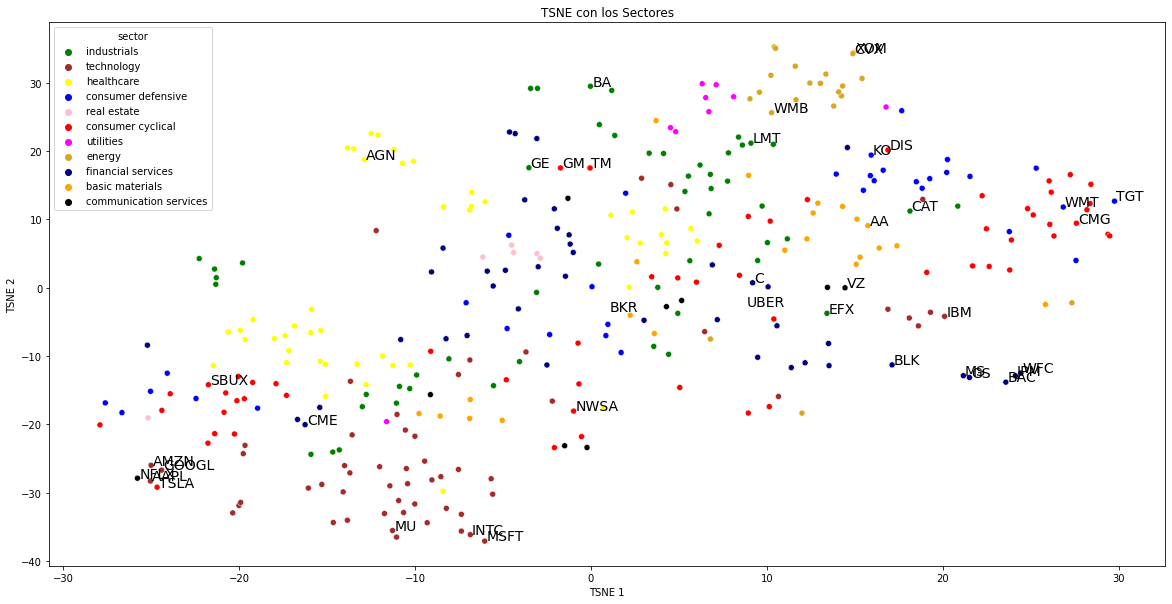

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.ylabel('TSNE 2')
plt.xlabel('TSNE 1')
plt.title('TSNE con los Sectores')
sns.scatterplot(data=df_TSNE,
                x="tsne1",
                y="tsne2",
                palette=palette,
                hue='sector')

for tick in df_TSNE_top.ticker:
  plt.text(df_TSNE_top.tsne1[df_TSNE_top.ticker==tick]+ 0.1,
           df_TSNE_top.tsne2[df_TSNE_top.ticker==tick]+ 0.1,
           tick, 
           fontdict=dict(color='black', size=14))

## TSNE agregando a cada ticker el nombre de la compañia

Agregar a cada ticker el vector que corresponde al nombre de la compañia,hacer un promedio de estos vectores, para ver si de esta forma se obtiene otra representacion que contenga mas informacion sobre cada ticker.


In [ ]:
url= '/content/drive/MyDrive/mentoria/symbols_tickers.json' #'Datasets/symbols_tickers.json'

In [ ]:
# Archivo json con nombre de compañias segun tickers
import json
with open(url) as file:
    data = json.load(file)

In [ ]:
def name_ticker(ticker):
    for i in range(len(data)):
        if (data[i]['symbol']==ticker):
            return(data[i]['name'])
       
    return -1
    
name_ticker('EL')

'ESTEE LAUDER COMPANIES-CL A'

In [ ]:
# Terminos que podria usar, o no, para limpiar nombres
names_clean=['inc','corp' ,'co' ,'ltd','group' ,'cl' ,'co-cl','plc-class','&' ,'company' ,'plc','pcl' ,'in' ]

In [ ]:
names_clean_in_emb=[]
for word in names_clean:
  #print(word)
  try:
    embeddings[word]
    names_clean_in_emb.append(word)
    #print(word, 'esta')
  except:
    #print(word, 'No esta')
    continue

In [ ]:
names_clean_in_emb

['inc', 'corp', 'co', 'ltd', 'group', 'cl', 'company', 'plc', 'pcl']

In [ ]:
# Crear lista de ticker y nombres de compañias
dict_ticker_company={}
list_no_company=[]
count=0
for ticker in ticker_list:
    #list_ticker_company.append(ticker.lower())
    company_name=name_ticker(ticker)
    if (company_name!=-1):
        company_name_list=company_name
        dict_ticker_company[ticker.lower()]=company_name_list.lower()+' '+ ticker.lower()
        #for word in company_name_list:
        #     dict_ticker_company.append(word.lower())
            #dict_ticker_company.append(word)
            #dict_ticker_company.append(primer_mayuscula(loword))
    else:
        dict_ticker_company[ticker.lower()]=ticker.lower()
        list_no_company.append(ticker)
        count+=1

In [ ]:
#dict_ticker_company

In [ ]:
len(dict_ticker_company) , len(ticker_list)

(388, 388)

In [ ]:
# Crear diccionario con vectores que forman el nombre de compania
emb_tick_with_comp_names= {}
list_no_encn=[]
count_no_encn=0
count_encn=0

for tick in ticker_low_list:
  
    dict_content= list(set(dict_ticker_company[tick].split())-set(set(dict_ticker_company[tick].split())&set(names_clean_in_emb)))
    temp_array=[]
    #print(dict_content)
    for word in dict_content:
      try:
        temp_array.append(embeddings[word])
        #print(temp_array)
        count_encn+=1
      except:
        list_no_encn.append(word)
        count_no_encn+=1
      #print(len(temp_array))
    if (len(temp_array)!=0):
      temp_array_np=np.array(temp_array)      
      emb_tick_with_comp_names[tick.upper()]=np.average(temp_array_np,axis=0) # Suma, promedio ?
    
   
print(count_no_encn)
print(count_encn)

149
965


In [ ]:
# ticker no encontrados en embedding
len(set(list_no_encn) & set(ticker_low_list))

10

In [ ]:
len(emb_tick_with_comp_names)

383

In [ ]:
embeddings.similar_by_vector(emb_tick_with_comp_names['GOLD'])

[('gold', 0.9077646732330322),
 ('silver', 0.8692494630813599),
 ('barrick', 0.8040914535522461),
 ('abx', 0.757229208946228),
 ('mag', 0.7350956797599792),
 ('copper', 0.7165840864181519),
 ('yamana', 0.7070299983024597),
 ('newmont', 0.6987410187721252),
 ('osisko', 0.692679762840271),
 ('asanko', 0.6890450716018677)]

In [ ]:
# Df con vectores para tickers
df_ticker_with_name= (pd.DataFrame(emb_tick_with_comp_names)).T.reset_index().rename(columns={'index':'tickers'})
df_ticker_with_name.head()

,tickers,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,LUV,-2.416088,3.124707,0.944714,0.543135,-1.545913,0.613804,-0.898047,-1.346507,-0.927137,-0.941162,-2.838796,-1.829651,-2.265861,-2.511715,-2.149068,2.188241,0.664267,0.572229,2.022516,-1.096612,2.197128,-1.657499,0.556949,-0.088146,-1.128477,1.020700,-2.015799,2.318249,-0.373779,-1.123385,-2.033140,1.170017,1.104106,-1.888671,0.054214,1.453537,1.347310,-2.527489,1.585456,1.785547,-0.210937,2.619895,-1.311436,0.001558,-1.168291,-1.313263,-1.192868,-0.222017,0.077726,...,1.942262,-2.042949,-2.057899,-1.124527,0.802098,-0.803439,2.202533,1.322568,-0.250532,-0.572965,1.909902,2.391365,0.128770,1.357572,0.301934,-2.488099,-2.704117,-0.574526,-1.349842,1.716736,-1.392269,-1.413848,0.037826,0.080402,1.820852,-2.254643,-1.767080,2.451968,3.537472,2.188631,-0.179417,2.324878,-0.921546,1.011366,-2.045712,2.641631,-0.221195,-0.394030,2.788415,-1.629672,2.645706,-1.472916,3.022183,-1.775196,-1.081497,2.105859,-0.021642,-1.445682,0.248956,-0.409889
1,RYAAY,-1.934190,3.896555,0.461824,0.205645,0.434615,0.585915,-0.314017,0.186466,0.217624,-1.377833,-3.082483,-0.776693,-0.054195,-0.309183,-1.656788,0.133263,0.838895,-0.501855,0.845780,-1.657696,1.181004,-0.191089,1.676757,-0.633552,0.639852,-1.103815,0.103684,-1.225241,1.038192,-0.916188,-0.214288,1.350653,0.601329,0.063932,2.637168,-0.331891,-1.509803,1.456031,0.711619,1.330644,-2.750915,0.729173,-0.237647,-1.349103,0.400173,-0.285538,-0.329345,0.876401,-0.251849,...,0.570537,0.038050,-1.572458,-3.002441,-1.619529,1.536083,2.120694,-0.275547,-0.605299,-0.234919,1.319901,1.614727,0.150562,0.461845,0.763949,-0.794473,1.173906,-0.296686,-0.210046,1.335724,-1.143920,-1.575940,-0.077735,1.616095,0.789681,-0.611327,0.486590,-1.242249,1.117749,0.063338,0.678873,1.188462,1.858733,-1.576333,-1.614432,0.988848,-0.924444,0.455713,-0.103257,-0.041586,-0.507050,-0.869870,2.235778,-0.018612,-0.610152,1.767265,0.392146,-1.027573,1.164271,1.883272
2,FSLR,-0.434022,0.898309,0.734658,1.035453,0.189960,1.643041,0.426842,0.325328,0.645862,-2.359926,1.574913,-0.375346,0.000106,2.289950,-0.845611,-1.982605,0.707946,-0.733277,0.675387,1.036404,-2.217644,0.225662,-0.085421,-1.091825,0.016366,-0.025717,0.464415,1.181348,-0.995457,0.469059,-0.892030,-0.065127,0.275069,1.414250,-0.678088,2.494380,-1.317719,1.543850,1.413289,-1.212410,-2.381899,0.641716,-0.616672,-2.398138,0.306552,-0.497178,0.161326,-2.311953,0.078602,...,-0.660026,2.408798,-0.846731,0.578408,0.823976,1.867893,1.946997,1.796853,-3.570161,0.001727,0.240415,-0.346522,1.154479,0.005040,-0.266267,-2.888509,-0.776692,-0.402977,-0.110254,-0.135712,0.874694,-0.630726,0.067812,2.177583,-0.930135,0.209318,-2.334997,-1.628307,0.110555,0.941455,0.425506,0.063642,-1.457003,0.636663,-3.280012,1.744358,-1.782087,-0.219572,1.553028,-2.311114,1.850240,-0.822654,-0.350510,-1.260809,0.344069,-1.213678,-0.273160,-0.176702,-0.514777,-0.197260
3,BIDU,-0.493778,2.565536,-1.484724,1.774270,0.456475,-1.413352,0.226218,0.431773,-1.283100,-1.652909,-3.015498,-1.046849,0.183153,1.192139,-2.026943,0.299026,0.827250,-1.984975,1.045778,-1.259665,1.784111,1.846800,1.501086,-1.381011,0.353413,-1.379600,0.590206,-0.899989,1.067702,-1.515037,-0.720163,0.253369,-0.762902,0.090601,0.841133,-0.110449,-0.877783,3.386523,-0.724906,-0.538571,-1.395574,1.284605,0.085092,-2.684503,-0.134280,3.067206,0.537500,-0.941888,-0.375501,...,0.575286,1.061014,-1.618937,-2.815569,-1.901312,1.295282,1.128931,0.915640,-2.889912,-1.041911,0.143952,-0.345745,2.026674,1.032251,1.448791,-2.396267,2.557598,-1.642700,0.169145,1.624431,-0.430006,0.657331,0.052145,2.242380,-1.929682,1.111654,0.216786,0.452422,2.967684,-0.025288,0.087200,-0.974698,0.662867,-0.424758,-2.246454,-1.581377,-0.489772,2.788073,0.447782,-

In [ ]:
df_ticker_with_name.isna().value_counts()

tickers  0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99   
False    False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  Fal

In [ ]:
# Matriz de embeddings
X_ticker_with_name=df_ticker_with_name.copy().drop(['tickers'],axis=1)
X_ticker_with_name.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-2.416088,3.124707,0.944714,0.543135,-1.545913,0.613804,-0.898047,-1.346507,-0.927137,-0.941162,-2.838796,-1.829651,-2.265861,-2.511715,-2.149068,2.188241,0.664267,0.572229,2.022516,-1.096612,2.197128,-1.657499,0.556949,-0.088146,-1.128477,1.020700,-2.015799,2.318249,-0.373779,-1.123385,-2.033140,1.170017,1.104106,-1.888671,0.054214,1.453537,1.347310,-2.527489,1.585456,1.785547,-0.210937,2.619895,-1.311436,0.001558,-1.168291,-1.313263,-1.192868,-0.222017,0.077726,0.504339,1.942262,-2.042949,-2.057899,-1.124527,0.802098,-0.803439,2.202533,1.322568,-0.250532,-0.572965,1.909902,2.391365,0.128770,1.357572,0.301934,-2.488099,-2.704117,-0.574526,-1.349842,1.716736,-1.392269,-1.413848,0.037826,0.080402,1.820852,-2.254643,-1.767080,2.451968,3.537472,2.188631,-0.179417,2.324878,-0.921546,1.011366,-2.045712,2.641631,-0.221195,-0.394030,2.788415,-1.629672,2.645706,-1.472916,3.022183,-1.775196,-1.081497,2.105859,-0.021642,-1.445682,0.248956,-0.409889
1,-1.934190,3.896555,0.461824,0.205645,0.434615,0.585915,-0.314017,0.186466,0.217624,-1.377833,-3.082483,-0.776693,-0.054195,-0.309183,-1.656788,0.133263,0.838895,-0.501855,0.845780,-1.657696,1.181004,-0.191089,1.676757,-0.633552,0.639852,-1.103815,0.103684,-1.225241,1.038192,-0.916188,-0.214288,1.350653,0.601329,0.063932,2.637168,-0.331891,-1.509803,1.456031,0.711619,1.330644,-2.750915,0.729173,-0.237647,-1.349103,0.400173,-0.285538,-0.329345,0.876401,-0.251849,0.522208,0.570537,0.038050,-1.572458,-3.002441,-1.619529,1.536083,2.120694,-0.275547,-0.605299,-0.234919,1.319901,1.614727,0.150562,0.461845,0.763949,-0.794473,1.173906,-0.296686,-0.210046,1.335724,-1.143920,-1.575940,-0.077735,1.616095,0.789681,-0.611327,0.486590,-1.242249,1.117749,0.063338,0.678873,1.188462,1.858733,-1.576333,-1.614432,0.988848,-0.924444,0.455713,-0.103257,-0.041586,-0.507050,-0.869870,2.235778,-0.018612,-0.610152,1.767265,0.392146,-1.027573,1.164271,1.883272
2,-0.434022,0.898309,0.734658,1.035453,0.189960,1.643041,0.426842,0.325328,0.645862,-2.359926,1.574913,-0.375346,0.000106,2.289950,-0.845611,-1.982605,0.707946,-0.733277,0.675387,1.036404,-2.217644,0.225662,-0.085421,-1.091825,0.016366,-0.025717,0.464415,1.181348,-0.995457,0.469059,-0.892030,-0.065127,0.275069,1.414250,-0.678088,2.494380,-1.317719,1.543850,1.413289,-1.212410,-2.381899,0.641716,-0.616672,-2.398138,0.306552,-0.497178,0.161326,-2.311953,0.078602,-1.659158,-0.660026,2.408798,-0.846731,0.578408,0.823976,1.867893,1.946997,1.796853,-3.570161,0.001727,0.240415,-0.346522,1.154479,0.005040,-0.266267,-2.888509,-0.776692,-0.402977,-0.110254,-0.135712,0.874694,-0.630726,0.067812,2.177583,-0.930135,0.209318,-2.334997,-1.628307,0.110555,0.941455,0.425506,0.063642,-1.457003,0.636663,-3.280012,1.744358,-1.782087,-0.219572,1.553028,-2.311114,1.850240,-0.822654,-0.350510,-1.260809,0.344069,-1.213678,-0.273160,-0.176702,-0.514777,-0.197260
3,-0.493778,2.565536,-1.484724,1.774270,0.456475,-1.413352,0.226218,0.431773,-1.283100,-1.652909,-3.015498,-1.046849,0.183153,1.192139,-2.026943,0.299026,0.827250,-1.984975,1.045778,-1.259665,1.784111,1.846800,1.501086,-1.381011,0.353413,-1.379600,0.590206,-0.899989,1.067702,-1.515037,-0.720163,0.253369,-0.762902,0.090601,0.841133,-0.110449,-0.877783,3.386523,-0.724906,-0.538571,-1.395574,1.284605,0.085092,-2.684503,-0.134280,3.067206,0.537500,-0.941888,-0.375501,1.674344,0.575286,1.061014,-1.618937,-2.815569,-1.901312,1.295282,1.128931,0.915640,-2.889912,-1.041911,0.143952,-0.345745,2.026674,1.032251,1.448791,-2.396267,2.557598,-1.642700,0.169145,1.624431,-0.430006,0.657331,0.052145,2.242380,-1.929682,1.111654,0.216786,0.452422,2.967684,-0.025288,0.087200,-0.974698,0.662867,-0.424758,-2.246454,-1.581377,-0.489772,2.788073,0.447782,-1.201708

In [ ]:
# Escalado
scaler_2 = preprocessing.StandardScaler().fit(X_ticker_with_name)
X_scaled_name = scaler_2.transform(X_ticker_with_name)
X_scaled_name.shape

(383, 100)

In [ ]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=5000, random_state=seed)
X_tsne_with_names = tsne.fit_transform(X_ticker_with_name)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 383 samples in 0.000s...
[t-SNE] Computed neighbors for 383 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 383 / 383
[t-SNE] Mean sigma: 4.840908
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.267929
[t-SNE] KL divergence after 1400 iterations: 1.033804
t-SNE done! Time elapsed: 3.6552658081054688 seconds


In [ ]:
df_ticker_with_name.head(3)

,tickers,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,LUV,-2.416088,3.124707,0.944714,0.543135,-1.545913,0.613804,-0.898047,-1.346507,-0.927137,-0.941162,-2.838796,-1.829651,-2.265861,-2.511715,-2.149068,2.188241,0.664267,0.572229,2.022516,-1.096612,2.197128,-1.657499,0.556949,-0.088146,-1.128477,1.020700,-2.015799,2.318249,-0.373779,-1.123385,-2.033140,1.170017,1.104106,-1.888671,0.054214,1.453537,1.347310,-2.527489,1.585456,1.785547,-0.210937,2.619895,-1.311436,0.001558,-1.168291,-1.313263,-1.192868,-0.222017,0.077726,...,1.942262,-2.042949,-2.057899,-1.124527,0.802098,-0.803439,2.202533,1.322568,-0.250532,-0.572965,1.909902,2.391365,0.128770,1.357572,0.301934,-2.488099,-2.704117,-0.574526,-1.349842,1.716736,-1.392269,-1.413848,0.037826,0.080402,1.820852,-2.254643,-1.767080,2.451968,3.537472,2.188631,-0.179417,2.324878,-0.921546,1.011366,-2.045712,2.641631,-0.221195,-0.394030,2.788415,-1.629672,2.645706,-1.472916,3.022183,-1.775196,-1.081497,2.105859,-0.021642,-1.445682,0.248956,-0.409889
1,RYAAY,-1.934190,3.896555,0.461824,0.205645,0.434615,0.585915,-0.314017,0.186466,0.217624,-1.377833,-3.082483,-0.776693,-0.054195,-0.309183,-1.656788,0.133263,0.838895,-0.501855,0.845780,-1.657696,1.181004,-0.191089,1.676757,-0.633552,0.639852,-1.103815,0.103684,-1.225241,1.038192,-0.916188,-0.214288,1.350653,0.601329,0.063932,2.637168,-0.331891,-1.509803,1.456031,0.711619,1.330644,-2.750915,0.729173,-0.237647,-1.349103,0.400173,-0.285538,-0.329345,0.876401,-0.251849,...,0.570537,0.038050,-1.572458,-3.002441,-1.619529,1.536083,2.120694,-0.275547,-0.605299,-0.234919,1.319901,1.614727,0.150562,0.461845,0.763949,-0.794473,1.173906,-0.296686,-0.210046,1.335724,-1.143920,-1.575940,-0.077735,1.616095,0.789681,-0.611327,0.486590,-1.242249,1.117749,0.063338,0.678873,1.188462,1.858733,-1.576333,-1.614432,0.988848,-0.924444,0.455713,-0.103257,-0.041586,-0.507050,-0.869870,2.235778,-0.018612,-0.610152,1.767265,0.392146,-1.027573,1.164271,1.883272
2,FSLR,-0.434022,0.898309,0.734658,1.035453,0.189960,1.643041,0.426842,0.325328,0.645862,-2.359926,1.574913,-0.375346,0.000106,2.289950,-0.845611,-1.982605,0.707946,-0.733277,0.675387,1.036404,-2.217644,0.225662,-0.085421,-1.091825,0.016366,-0.025717,0.464415,1.181348,-0.995457,0.469059,-0.892030,-0.065127,0.275069,1.414250,-0.678088,2.494380,-1.317719,1.543850,1.413289,-1.212410,-2.381899,0.641716,-0.616672,-2.398138,0.306552,-0.497178,0.161326,-2.311953,0.078602,...,-0.660026,2.408798,-0.846731,0.578408,0.823976,1.867893,1.946997,1.796853,-3.570161,0.001727,0.240415,-0.346522,1.154479,0.005040,-0.266267,-2.888509,-0.776692,-0.402977,-0.110254,-0.135712,0.874694,-0.630726,0.067812,2.177583,-0.930135,0.209318,-2.334997,-1.628307,0.110555,0.941455,0.425506,0.063642,-1.457003,0.636663,-3.280012,1.744358,-1.782087,-0.219572,1.553028,-2.311114,1.850240,-0.822654,-0.350510,-1.260809,0.344069,-1.213678,-0.273160,-0.176702,-0.514777,-0.197260


In [ ]:
url= "/content/drive/MyDrive/mentoria/dict_tick_sector.json"
import json
with open(url) as file:
    data_sector = json.load(file)

In [ ]:
def sector(ticker):
  try:
    return data_sector[ticker.lower()]
  except:
    return 'nan'

In [ ]:
df_ticker_with_name["Sector"]=df_ticker_with_name["tickers"].apply(lambda x: sector(x.lower()))

df_ticker_with_name["Sector"].value_counts()

consumer cyclical         60
technology                58
industrials               52
healthcare                48
financial services        45
consumer defensive        33
basic materials           22
energy                    22
nan                       18
utilities                 10
communication services     9
real estate                6
Name: Sector, dtype: int64

In [ ]:
tickers_ticker_w_name= df_ticker_with_name.tickers
sector_w_name= df_ticker_with_name.Sector

df_TSNE_2_wna = pd.DataFrame(X_tsne_with_names)\
                  .assign(sector=sector_w_name, ticker= tickers_ticker_w_name)\
                  .rename(columns = { 0 :'tsne1', 1: 'tsne2'})

df_TSNE_2= df_TSNE_2_wna.loc[df_TSNE_2_wna['sector'] != "nan"]

In [ ]:
df_TSNE_w_name_top= df_TSNE_2_wna[df_TSNE_2_wna["ticker"].isin(ticker_top)]
df_TSNE_w_name_top.head(3)

,tsne1,tsne2,sector,ticker
14,-6.990424,-1.295148,consumer cyclical,CMG
19,6.023574,5.015416,technology,IBM
20,-12.795094,-2.354261,consumer cyclical,GM


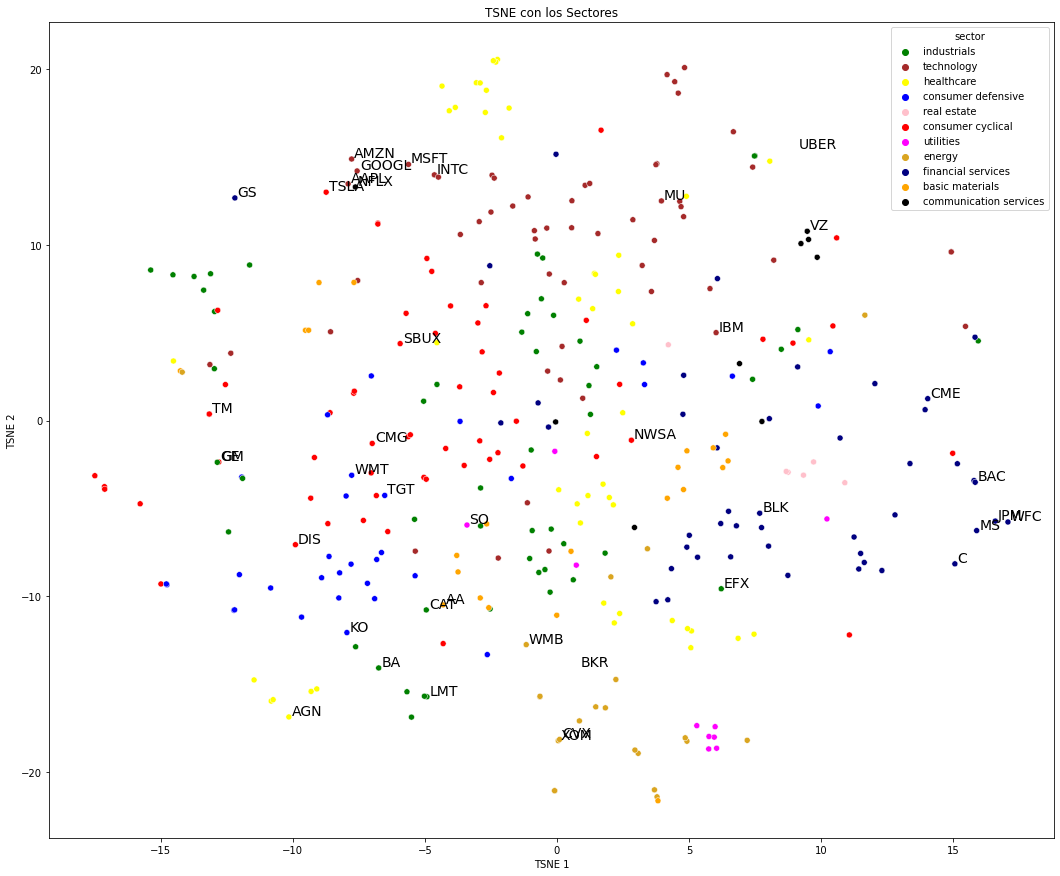

In [ ]:
plt.figure(figsize=(18, 15))

plt.ylabel('TSNE 2')
plt.xlabel('TSNE 1')
plt.title('TSNE con los Sectores')
sns.scatterplot(data=df_TSNE_2,
                x="tsne1",
                y="tsne2",
                palette=palette,
                hue='sector')

for tick in df_TSNE_w_name_top.ticker:
  plt.text(df_TSNE_w_name_top.tsne1[df_TSNE_w_name_top.ticker==tick]+ 0.1,
           df_TSNE_w_name_top.tsne2[df_TSNE_w_name_top.ticker==tick]+ 0.1,
           tick,
           fontdict=dict(color='black', size=14))

En el grafico anterior podemos observar 'que aprende' , la representacion en vectores realizada con word2vec, sobre las compañias que son mencionados en las noticias financieras. Se observa que las relaciones aprendidas parecen tener alguna relacion con los sectores a los que pertenecen. Empresas tecnologicas como NFLX,AMZN, GOGL, aparecen en el plano mas cerca entre si; al igual que empresas relacionadas al sector financiero como BAC,JPM,WFC.